## Binomial Simulation

A primitive method to stochastically estimate probability

In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [5]:
np.random.randint(2, size=30)

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1])

In [13]:
count=0
N=500000
for i in range(N):
    trials = np.random.randint(2, size=30)
    if (trials.sum() >= 22): count += 1

print(f'Prob of heads >= 22: {count/N}')

Prob of heads >= 22: 0.008082


## Z-transformation

Terminology: loc = mean, scale = std dev

In [17]:
dist = stats.norm(loc = 10, scale=3)  #normal distribution with mü=10, sigma=3
smp = dist.rvs(60)  #draws samples from the given distribution
smp

array([12.05818991,  8.96496009, 12.29408219,  8.9776419 ,  7.87129995,
        9.00800387, 15.10621063, 12.06372304, 13.90426947,  5.70848633,
        9.47602794,  4.75993916, 13.95515649,  7.25310681, 11.23873463,
       14.61819746,  9.46532913,  9.28112947,  9.34551186,  9.82656692,
        8.72890095, 11.28282139,  7.81367926, 12.70960359, 13.0045152 ,
       11.54710881, 12.00815824,  9.84777302, 10.12479288, 12.1940227 ,
        8.26710639,  9.0981833 , 15.61025231,  9.87197264, 10.7609293 ,
       10.58525521,  9.71002365, 11.07920384,  9.16636124,  6.8647273 ,
        2.87399514,  7.36330338, 11.02621147, 10.61189761,  7.62907208,
       14.80951493,  7.7381291 ,  9.86056206,  6.93640956,  5.48905421,
       10.46165421,  9.18190839,  7.40965661, 14.34895854,  6.67427636,
        8.38838854, 13.48581423, 10.16679478, 10.60341776, 14.39757305])

In [19]:
smp.mean(), smp.std()

(10.081809174474047, 2.6903707855740184)

In [21]:
np.mean(smp), np.std(smp, ddof=1)           #ddof=1 demek (n-1)'e böl demek. Bu sayede sample'a ilşikin varyansı bulursun.

(10.081809174474047, 2.7130747390237846)

In [25]:
smp_tr = (smp-np.mean(smp))/np.std(smp,ddof=1)      #transofrmed sample
smp_tr, np.mean(smp_tr), np.std(smp_tr, ddof=1)

(array([ 0.72846528, -0.41165438,  0.81541175, -0.40698004, -0.81476164,
        -0.39578906,  1.85192151,  0.73050471,  1.40890343, -1.61194337,
        -0.22328218, -1.9615641 ,  1.42765964, -1.04261866,  0.42642594,
         1.67204693, -0.2272256 , -0.29511893, -0.27138851, -0.09407859,
        -0.49866235,  0.44267568, -0.83599979,  0.96856691,  1.07726705,
         0.54008819,  0.71002433, -0.08626233,  0.01584317,  0.77853127,
        -0.66887313, -0.36255023,  2.03770396, -0.0773427 ,  0.25031383,
         0.18556291, -0.13703475,  0.36762521, -0.33742083, -1.18576972,
        -2.65669571, -1.00200181,  0.34809299,  0.19538291, -0.90404332,
         1.74256377, -0.86384649, -0.08154848, -1.15934868, -1.69282287,
         0.14000537, -0.33169038, -0.98491668,  1.57280937, -1.25596717,
        -0.62417029,  1.25466689,  0.03132446,  0.19225736,  1.59072797]),
 1.8503717077085943e-16,
 1.0)

## Distributions

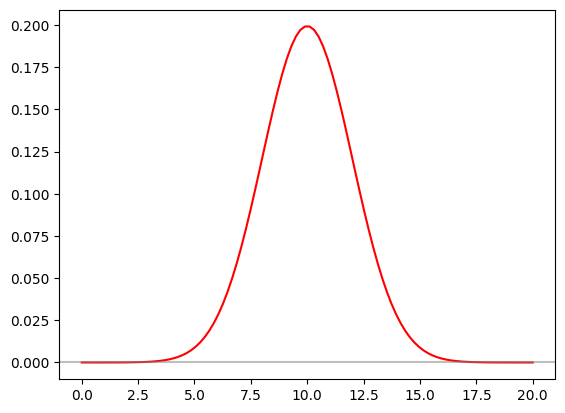

In [34]:
dist = stats.norm(10,2)
x = np.linspace(0,20,100)
y1= dist.pdf(x)
plt.plot(x,y1,color = 'red' )       #pdf of normal distribution (10,2)
plt.axhline(y=0, color = 'grey', alpha=0.5)

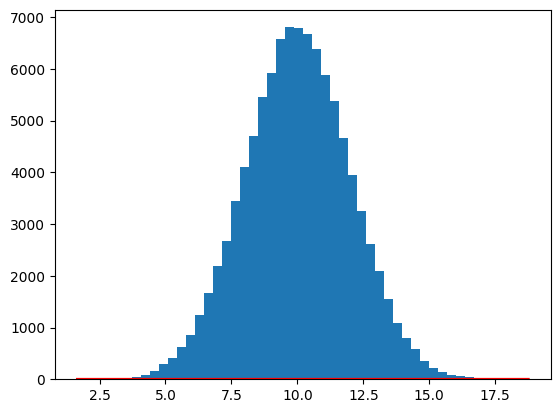

In [37]:
dist = stats.norm(10,2)
y2 = dist.rvs(100000)
plt.hist(y2, bins=50)
x = np.linspace(y2.min(),y2.max(), 100)
plt.plot(x, dist.pdf(x),color = 'red', lw=2 )
plt.show()

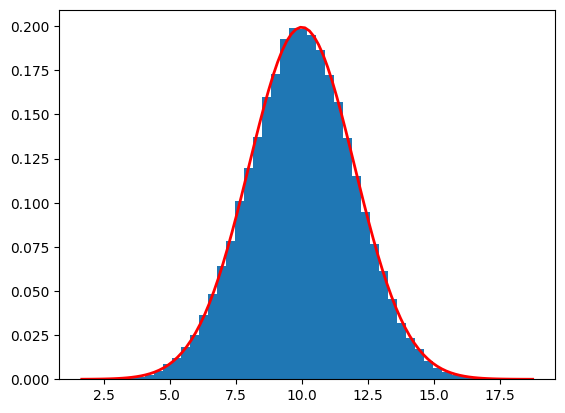

In [38]:
#You need to scale, density=True
plt.hist(y2, bins=50, density=True)
x = np.linspace(y2.min(),y2.max(), 100)
plt.plot(x, dist.pdf(x),color = 'red', lw=2 )
plt.show()

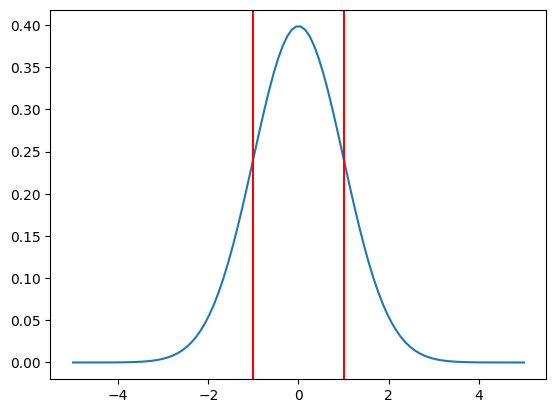

In [45]:
dist = stats.norm(0,1)
x = np. linspace (-5, 5, 100)
y = dist.pdf(x)
plt.plot (x, y)
plt.axvline(x=-1, color='red') 
plt.axvline(x=1, color='red')

In [39]:
# area between minus inf and 0 : Use cdf for cumulative d.f. 
dist.cdf (0)

2.8665157187919333e-07

In [47]:
1- dist.cdf(4)      #almost zero

3.167124183311998e-05

In [49]:
dist.cdf(3) - dist.cdf(-3)      #as you see, it corresponds to 99.7% with 3 sigma

0.9973002039367398

In [52]:
#ppf finds the x value that corresponds to a certain area
dist.ppf(0.5), dist.ppf(0.9999999999999999999999)

(0.0, inf)

## Unbiased Estimator for the sample mean & variance

In [55]:
x = np.random.normal(loc = 4, scale = 4, size = 10)
x.mean()

4.943825103749427

In [59]:
sum_ = 0
N= 500
for i in range(N):
    x = np.random.normal(4,4,10)
    sum_ = sum_ + x.mean()

print(f'Mean is: {sum_/N} ')

Mean is: 3.9524899661750927 


In [65]:
var_biased = 0
var_unbiased = 0
N=100000
n=10 #sample size
for i in range(N):
    x = np.random.normal(4,4,10)
    var_biased += np.sum((x-x.mean())**2)/n
    var_unbiased += np.sum((x-x.mean())**2)/(n-1)
print(f'var_biased: {var_biased/N},var_unbiased: {var_unbiased/N}')
print(f'std-dev_biased: {np.sqrt(var_biased/N)},std-dev_unbiased: {np.sqrt(var_unbiased/N)}')


var_biased: 14.394365726477844,var_unbiased: 15.993739696086616
std-dev_biased: 3.7939907388497724,std-dev_unbiased: 3.999217385450135


## Central Limit Theorem Simulation

In [66]:
dist = stats.gamma(2,5)
pop = dist.rvs(1000000)

np.var(pop), np.mean(pop)

(2.003839851023561, 7.0016946021450455)

In [79]:
# n = sample size
def clt(n):
    means = list([])
    for i in range(500):
        means.append(dist.rvs(n).mean())

    print(np.sqrt(2/n))     #theoretical standard error (SE) #2 = population std dev
    print(np.sqrt(np.var(means, ddof=1)))
    plt.hist(means, bins=30)

1.0
0.9647895087965985


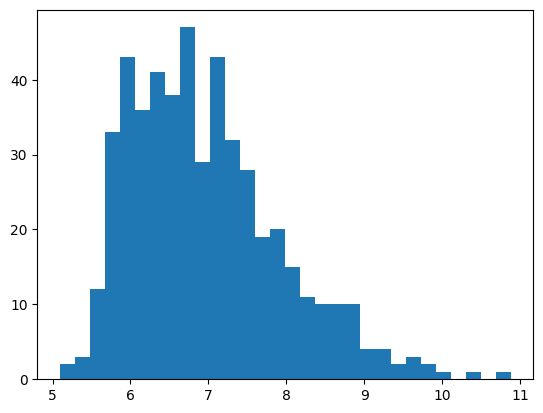

In [80]:
clt(2)